## Homework 8
### Math 472
### Meghan Edgerton

## Question 1:

Implementing Example 6.3 on page 165 of Computational Statistics, reproduce figure 6.7.

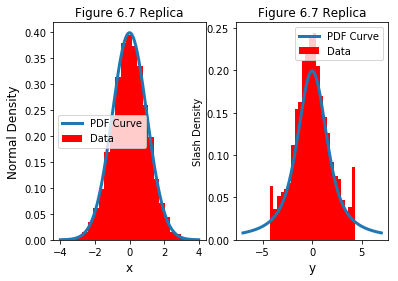

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy

# Sample sizes
n = 5000
m = 100000

# Define Y as the slash distribution from the book
Y = st.norm.rvs(size = m)/st.uniform.rvs(size=m)

# Slash density function as defined in the book
def slashdist(x):
    if x == 0:
        U = 1/(np.sqrt(2*np.pi))
        return U
    else:
        V = (1-np.exp(-x**2/2))/(x**2*np.sqrt(2*np.pi))
        return V

den = []

for yvals in Y:
    den.append(st.norm.pdf(yvals)/slashdist(yvals))
den = np.sum(den)

# SIR algorithm using a slash distribution envelope
def wSIR(x,den):
    return (st.norm.pdf(x)/slashdist(x))/den

Wvalues = []

for yvals in Y:
    Wvalues.append(np.asscalar(wSIR(yvals,den)))

# Creating the density plot similar to figure 6.7
Xvalues = np.random.choice(Y,size=n,replace=True,p=Wvalues)
figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax1.hist(Xvalues,density=True,bins=24,color='r',label = 'Data')
xs = np.linspace(-4,4,n)
ax1.plot(xs,st.norm.pdf(xs),linewidth = 3, label = 'PDF Curve')

ax1.set_title('Figure 6.7 Replica')
plt.xlabel('x',fontsize=12)
plt.ylabel('Normal Density',fontsize=12)
plt.legend()

Ys = st.norm.rvs(size=m)
den = []
for yvals in Ys:
    den.append(slashdist(yvals)/st.norm.pdf(yvals))
den = np.sum(den)

# SIR algorithm using a normal envelope
def wSIR2(x,den):
    return (slashdist(x)/st.norm.pdf(x))/den

Wvalues2 = []

for yvals in Ys:
    Wvalues2.append(np.asscalar(wSIR2(yvals,den)))
    
Xvalues2 = np.random.choice(Ys,size=n,replace=True,p=Wvalues2)

ax2 = figure.add_subplot(1,2,2)
ax2.hist(Xvalues2,density=True,bins=24,color = 'r',label='Data')
xs = np.linspace(-7,7,n)

var = []

for X in xs:
    var.append(slashdist(X))
    
ax2.plot(xs,var,label='PDF Curve',linewidth = 3)
ax2.set_title('Figure 6.7 Replica')
plt.xlabel('y',fontsize=12)
plt.ylabel('Slash Density')
plt.legend()

## Question 2:

Implement the SIR algorithm in Example 6.4 on page 166 for the case of Example 6.2. Report your estimated posterior mean and posterior standard deviation. Show the generated random samples by superimposing the following three items in a single plot:

(a) a relative frequency histogram with appropriate number of bars for your generated random numbers with samples size $n=5000$

(b) an estimated probability density curve based on the generated random numbers

(c) the true posterior probability density curve


The estimation of the posterior mean is:
4.276434688576895

The estimation of the posterior standard deviation is:
0.6220661378524656


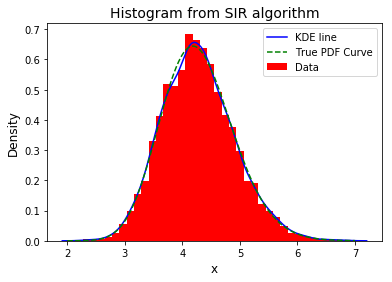

In [2]:
# an array of the observations from example 6.2
x = np.array([8,3,4,3,1,7,2,6,2,7])

# Sample sizes
n = 5000
m = 100000

# Lognormal Prior Distribution
def f(lambdaa):
    return st.lognorm.pdf(lambdaa,s=0.5,scale=4)

lambdavals = st.lognorm.rvs(s = 0.5, scale = 4, size = m)

# Likelihood function
def L(lambdaa, x):
    ls = []
    for x_i in x:
        ls.append(st.poisson.pmf(x_i,lambdaa))
    return np.prod(ls)

den = []
for lvals in lambdavals:
    den.append(L(lvals,x))
den = np.sum(den)

# SIR algorithm envelope
def wSIR3(lambdaa,den):
    return (L(lambdaa,x))/den

Wvalues3 = []

for lvals in lambdavals:
    Wvalues3.append(wSIR3(lvals,den))
    
Xvalues3 = np.random.choice(lambdavals,size=n,replace=True,p=Wvalues3)

# Creating the histogram with PDF curve and true posterior curve
plt.figure()
plt.hist(Xvalues3,density=True,bins = 36,color = 'r',label='Data')
sns.distplot(Xvalues3,hist=False,kde=True,color='b',label = 'KDE line')
xs = np.linspace(2,7,500)

ls = []
for i in range(xs.size):
    ls.append(L(xs[i],x)*f(xs[i]))
sc = scipy.integrate.simps(ls,xs)
ls = (1/sc)*np.array(ls)

plt.plot(xs,ls,'--',color='g',label = 'True PDF Curve')
plt.legend()
plt.title('Histogram from SIR algorithm',fontsize=14)
plt.xlabel('x',fontsize=12)
plt.ylabel('Density', fontsize = 12)

# Print the posterior mean and standard deviation
print('The estimation of the posterior mean is:')
print(Xvalues3.mean())
print()
print('The estimation of the posterior standard deviation is:')
print(Xvalues3.std())
